In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image

import ssl
ssl._create_default_https_context = ssl._create_unverified_context


In [2]:
#  Use pandas to read in the data
df = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats')[0]

In [3]:
#  Add a column to the dataframe with the path to the logo
df['badge'] = df['Squad'].apply(lambda x: f'./Club Logos/{x}.png')
df = df[['Rk', 'badge', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP', 'xG', 'xGA', 'xGD']]
df.head()

,Rk,badge,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD
0,1,./Club Logos/Liverpool.png,Liverpool,21,14,6,1,47,18,29,48,2.29,45.7,24.0,21.7
1,2,./Club Logos/Manchester City.png,Manchester City,20,13,4,3,48,23,25,43,2.15,39.7,19.1,20.6
2,3,./Club Logos/Arsenal.png,Arsenal,21,13,4,4,42,20,22,43,2.05,39.4,16.7,22.7
3,4,./Club Logos/Aston Villa.png,Aston Villa,21,13,4,4,43,27,16,43,2.05,37.2,26.7,10.4
4,5,./Club Logos/Tottenham.png,Tottenham,21,12,4,5,44,31,13,40,1.90,36.4,35.5,0.9


In [4]:
# Define colors
bg_color = "#FFFFFF"  # White background
text_color = "#000000"  # Black text

# Define row colors for the table
row_colors = {
    "top4": "#6DB67B",        # Muted green for top 4
    "top6": "#A4E0B7",        # Lighter shade of green for top 6
    "relegation": "#DD6A74",  # Soft red for relegation
    "even": "#424242",        # Darker gray for even rows
    "odd": "#616161"          # Medium gray for odd rows
}


# Set default matplotlib rcParams for plot styling
plt.rcParams['text.color'] = text_color
plt.rcParams['font.family'] = "monospace"
plt.rcParams['axes.facecolor'] = bg_color
plt.rcParams['figure.facecolor'] = bg_color
plt.rcParams['axes.titleweight'] = 'bold'


In [5]:
col_defs = [
	ColumnDefinition(
		name = "Rk",
		textprops = {"ha" : "center"},
		width = 0.5
		),
	ColumnDefinition(
		name = "badge",
		textprops = {"ha" : "center", "va" : "center", "color" : bg_color},
		width = 0.5,
		plot_fn = image
		),
	ColumnDefinition(
		name = "Squad",
		textprops = {"ha" : "left", "weight" : "bold"},
		width = 2
		),
	ColumnDefinition(
		name = "MP",
		group = "Matches",
		textprops = {"ha" : "center"},
		width = 0.5
		),
	ColumnDefinition(
		name = "W",
		group = "Matches",
		textprops = {"ha" : "center"},
		width = 0.5
		),
	ColumnDefinition(
		name = "D",
		group = "Matches",
		textprops = {"ha" : "center"},
		width = 0.5
		),
	ColumnDefinition(
		name = "L",
		group = "Matches",
		textprops = {"ha" : "center"},
		width = 0.5
		),
	ColumnDefinition(
		name = "GF",
		group = "Goals",
		textprops = {"ha" : "center"},
		width = 0.5
		),
	ColumnDefinition(
		name = "GA",
		group = "Goals",
		textprops = {"ha" : "center"},
		width = 0.5
		),
	ColumnDefinition(
		name = "GD",
		group = "Goals",
		textprops = {"ha" : "center"},
		width = 0.5
		),
	ColumnDefinition(
		name = "Pts",
		group = "Points",
		textprops = {"ha" : "center"},
		width = 0.5
		),
	ColumnDefinition(
		name = "Pts/MP",
		group = "Points",
		textprops = {"ha" : "center"},
		width = 0.5
		),
	ColumnDefinition(
		name = "xG",
		group = "Expected Goals",
		textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(df["xG"], cmap=matplotlib.cm.RdYlGn, num_stds=2),
		),
	ColumnDefinition(
		name = "xGA",
		group = "Expected Goals",
		textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
		cmap=normed_cmap(df["xGA"], cmap=matplotlib.cm.RdYlGn_r, num_stds=2)
		),
	ColumnDefinition(
		name = "xGD",
		group = "Expected Goals",
		textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
		cmap=normed_cmap(df["xGD"], cmap=matplotlib.cm.RdYlGn, num_stds=2)
		)
]

		

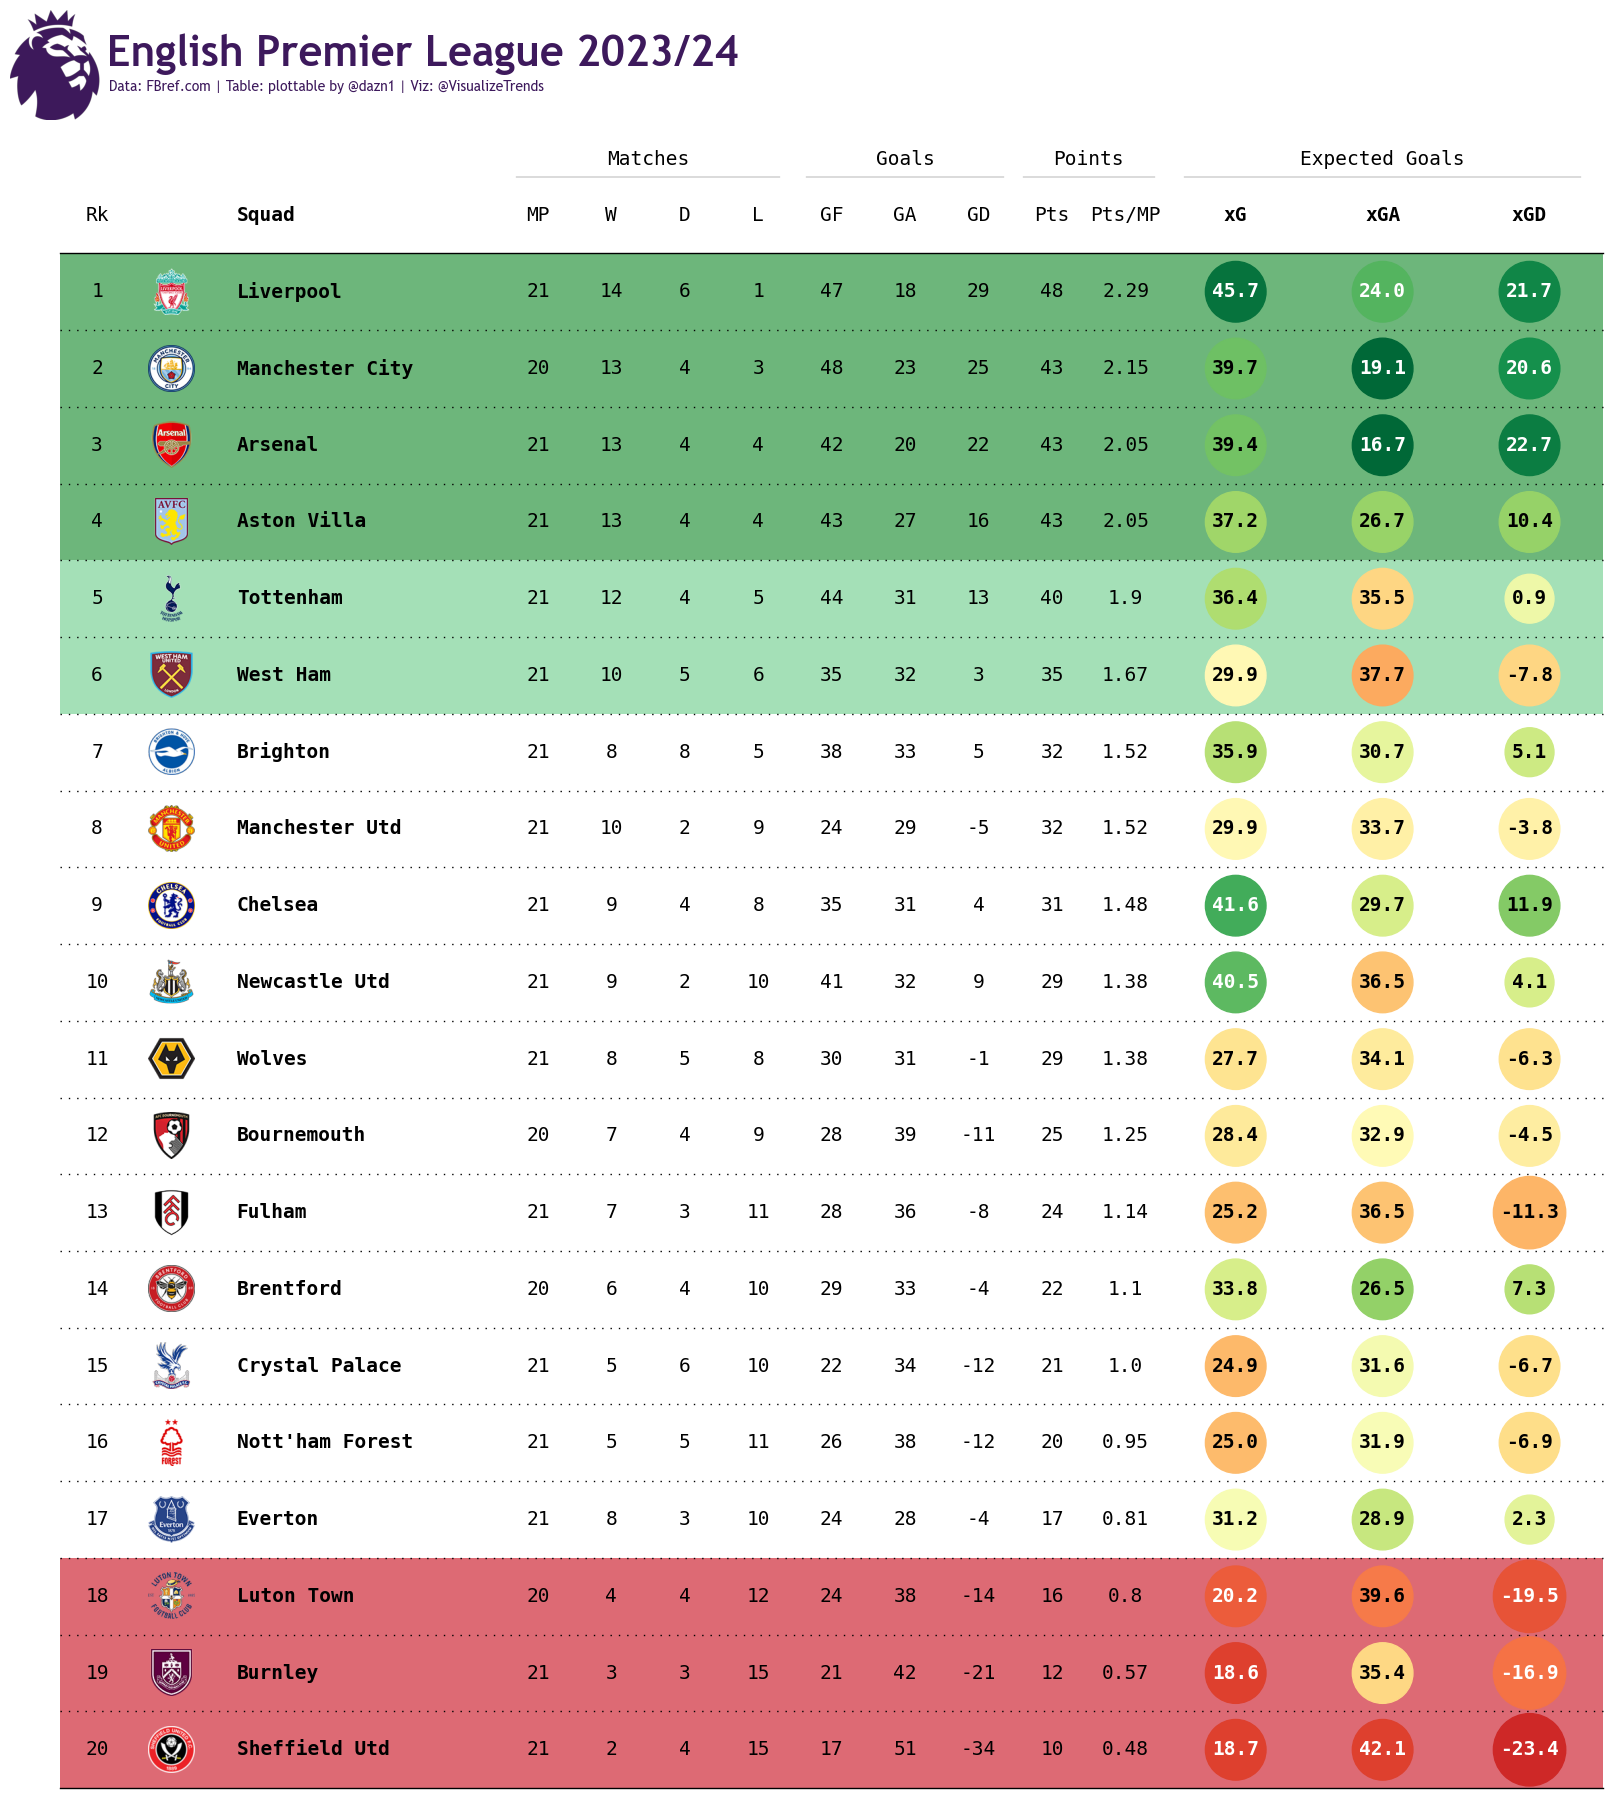

In [6]:
fig, ax = plt.subplots(figsize=(20, 22))

table = Table(
    df,
    column_definitions=col_defs,
    index_col="Rk",
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    footer_divider=True,
    textprops={"fontsize": 14},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-" },
    column_border_kw={"linewidth": 2, "linestyle": "-"},
    ax=ax
).autoset_fontcolors(colnames=["xG", "xGA", "xGD"])

# Highlight specific rows with colors
highlight_rows = {
    "top4": [0, 1, 2, 3],
    "top6": [4, 5],
    "relegation": [17, 18, 19]
}

for category, indices in highlight_rows.items():
    for idx in indices:
        table.rows[idx].set_facecolor(row_colors[category])

# Matchday information
matchday = df['MP'].iloc[0]
header_text = f"English Premier League 2023/24"
subheader_text = f"Data: FBref.com | Table: plottable by @dazn1 | Viz: @VisualizeTrends"
fig.text(0.308, 0.9, header_text, color="#3D195C", ha="center", va="center", fontsize=30, fontweight="bold", fontname = 'Trebuchet MS')
fig.text(0.26, 0.885, subheader_text, color = "#3D195C" , ha="center", va="center", fontsize=10, fontname = 'Trebuchet MS')


#add logo to the top left
logo = plt.imread('./Logo 1.png')
logo_ax = fig.add_axes([0.1, 0.87, 0.05, 0.05])
logo_ax.imshow(logo)
logo_ax.axis('off')

# #add logo to the top left
# logo = plt.imread('/Users/vivektiwari/Code/Programming/visualizetrends/VT.png')
# logo_ax = fig.add_axes([.85, 0.87, 0.05, 0.05])
# logo_ax.imshow(logo)
# logo_ax.axis('off')

# Save the figure
fig.savefig(f"EPL_Standings_{matchday}.png", bbox_inches="tight", facecolor=bg_color)

plt.show()
